In [218]:
import pathlib
import numpy as np
import tensorflow as tf
import glob
import cv2
import seaborn as sns

In [219]:
test_images_path = glob.glob('test/test/*/*.jpg')
train_images_path = glob.glob('train/train/*/*.jpg')

In [220]:
def prepare_dataset(paths: pathlib.Path):
    X = np.zeros((len(paths), 50, 50), dtype=float)
    y = np.zeros(len(paths), dtype=int)
    for i, v in enumerate(paths):
        tmp = cv2.imread(v, cv2.IMREAD_GRAYSCALE)
        #X[i] = cv2.resize(tmp, dsize=(10,10))
        X[i] = tmp
        y[i] = int(v.split('/')[-2])
    return X, y
X_test, y_test = prepare_dataset(test_images_path)
X_train, y_train = prepare_dataset(train_images_path)

In [221]:
X_test = X_test/X_test.max()
X_train = X_train/X_train.max()

In [222]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(50,50)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax'),
])
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Flatten(input_shape=(10,10)),
#    tf.keras.layers.Dense(100, activation='relu'),
#    tf.keras.layers.Dense(25, activation='relu'),
#    tf.keras.layers.Dense(20, activation='softmax'),
#])
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [223]:
model.fit(X_train, y_train, batch_size=100)

180/180 [==============================] - 7s 34ms/step - loss: 0.1114 - accuracy: 0.9714


188/188 [==============================] - 1s 3ms/step


<Axes: >

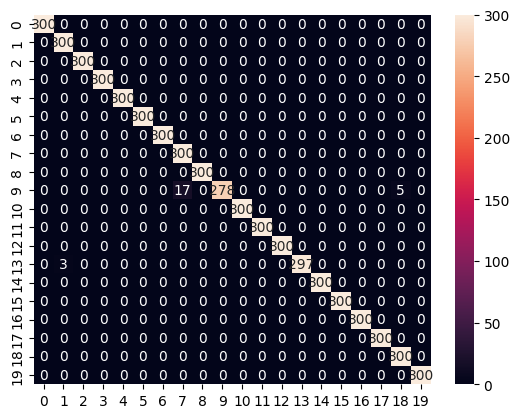

In [224]:
sns.heatmap(tf.math.confusion_matrix(y_test, model.predict(X_test).argmax(axis=1)), annot=True, fmt='d')

1/1 [==============================] - 0s 19ms/step
12
12


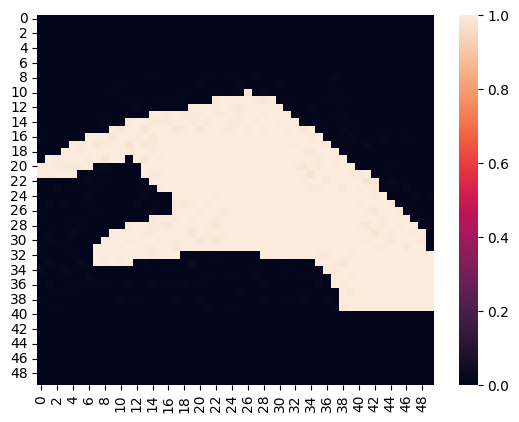

In [225]:
sns.heatmap(X_test[0])
print(np.argmax(model.predict(X_test[0].reshape(-1, 50, 50))))
print(y_test[0])
